In [108]:
import torch
import pandas as pd
from nltk.translate.bleu_score import corpus_bleu, sentence_bleu
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option("display.max_colwidth", 1000)

In [89]:
!pip install matplotlib --quiet

In [14]:
ls assignment4/outputs/

gradescope_test_outputs.txt  test_outputs.txt


In [66]:
source_en = open("assignment4/en_es_data/test.en", "r")
pred_en = open("assignment4/outputs/test_outputs.txt", "r")
samples = []
for src, prd in zip(source_en, pred_en):
    record = {}
    record["src"] = src.split()
    record["prd"] = prd.split()
    samples.append(record)
    
df = pd.DataFrame(samples)

In [69]:
df.head()

,src,prd
0,"[You, know,, what, I, do, is, write, for, chil...","[You, know, what, I, do, is, to, write, for, k..."
1,"[And, I, always, tell, people, that, I, don't,...","[And, I, always, tell, the, people, I, don't, ..."
2,"[You, can, have, me, as, a, farmer,, or, in, l...","[I, can, tell, you, as, a, farmer,, or, with, ..."
3,"[I'm, here, today, to, talk, to, you, about, c...","[I'm, here, to, talk, about, circles, and, <unk>]"
4,"[And, you, know,, an, epiphany, is, usually, s...","[And, you, know, that, an, epiphany, is, gener..."


In [72]:
df["sentence_bleu"] = df.apply(lambda row: sentence_bleu([row["src"]], row["prd"]), axis=1)

/Users/neha.bora/anaconda3/envs/local_nmt/lib/python3.6/site-packages/nltk/translate/bleu_score.py:523: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/Users/neha.bora/anaconda3/envs/local_nmt/lib/python3.6/site-packages/nltk/translate/bleu_score.py:523: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/Users/neha.bora/anaconda3/envs/local_nmt/lib/python3.6/site-packages/nltk/translate/bleu_score.py:523: UserWarning: 
The hypothesis contains 0 counts of 2-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order i

In [86]:
df["en_length"] = df["src"].apply(lambda x: len(x))
df["bleu_bkt"] = pd.cut(df.sentence_bleu, bins=10, labels=[0,1,2,3,4,5,6,7,8,9])

In [121]:
df[df["bleu_bkt"]==0].sort_values(by="sentence_bleu", ascending=True).sample(10)

,src,prd,sentence_bleu,en_length,bleu_bkt
1608,"[But, these, apps, are, like, little, digital, reminders, that, we're, not, just, consumers,, and, we're, not, just, consumers, of, government,, putting, in, our, taxes, and, getting, back, services.]","[But, these, applications, are, like, digital, <unk>, that, we, are, not, only, consumers,, we're, not, only, consumers, of, government, we, pay, taxes, and, we, get, services.]",8.050112e-155,28,0
1428,"[Like, the, concrete, block,, the, transistor, allows, you, to, build, much, larger,, more, complex, circuits,, one, brick, at, a, time.]","[Just, like, the, block, of, concrete,, the, transistor, allows, to, create, a, much, bigger, and, more, complex,, a, brick, at, the, time.]",2.985703e-78,20,0
4544,"[I, had, finally, gotten, my, chance, and, I, blew, it,, and, I, knew, I, would, never, get, invited, back.]","[I, had, my, opportunity, and, <unk>, I, knew, they, wouldn't, come, back, to, me.]",5.288646e-155,19,0
2048,"[And, this, game, has, been, played, by, university, professors, and, so, forth.]","[They, have, played, with, this, college, professors, among, others.]",9.918892e-232,12,0
2741,"[And, when, I, listened, to, her,, she, was, making, a, wheezy, sound.]","[I, heard, a, <unk>, sound.]",3.953974e-232,12,0
5964,"[I, was, shocked, to, learn, that, many, well-meaning, programs, are, inadvertently, actually, making, the, situation, worse.]","[I, was, very, surprised, when, I, learned, that, a, lot, of, <unk>, programs, without, realizing, it,, <unk>, the, situation.]",5.186904e-155,16,0
2373,"[And, they, actually, illuminate, your, way, through, the, rest, of, the, book.]","[And, actually,, they, light, your, way, into, what, subtraction, of, the, book.]",4.337580e-78,12,0
663,"[And, I, think, what, is, remarkable, that, has, happened, over, the, past, couple, of, years, is, that,, over, the, past, couple, of, decades,, we, went, from, the, physical, world, to, the, digital, one.]","[And, I, think, the, remarkable, thing, that, has, happened, in, the, last, few, years, is, that,, in, the, last, two, decades,, we, spent, the, physical, world, in, the, digital, world.]",4.644519e-78,33,0
3089,"[But, Western, governments, are, doing, it, to, themselves, as, well.]","[But, Western, governments, also, do, this, to, themselves.]",3.736372e-78,10,0
6841,"[Take, the, armor, off., Be, yourself.]","[<unk>, the, <unk>, Be, yourself.]",7.600394e-155,6,0


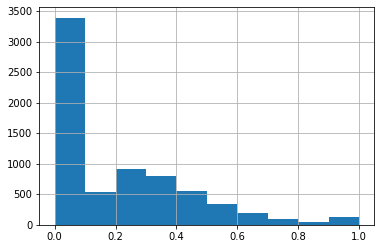

In [92]:
df.sentence_bleu.hist()

In [118]:
df.groupby("bleu_bkt")[["sentence_bleu","en_length"]].mean()

,sentence_bleu,en_length
bleu_bkt,,
0,0.000501,11.889708
1,0.161897,27.398887
2,0.250776,22.311475
3,0.349501,21.027431
4,0.444358,18.236794
5,0.543959,15.836310
6,0.645271,13.333333
7,0.739945,12.968421
8,0.838678,11.185185


In [117]:
df.corr()

,sentence_bleu,en_length
sentence_bleu,1.000000,0.127854
en_length,0.127854,1.000000


In [122]:
r1 = "love can always find a way".split()
r2 = "love makes anything possible".split()
c1 = "the love can always do".split()
c2 = "love can make anything possible".split()

In [124]:
sentence_bleu([r1,r2], c1, weights=(0.5,0.5,0,0))

/Users/neha.bora/anaconda3/envs/local_nmt/lib/python3.6/site-packages/nltk/translate/bleu_score.py:523: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)


0.5477225575051662

In [125]:
sentence_bleu([r1,r2], c2, weights=(0.5,0.5,0,0))

/Users/neha.bora/anaconda3/envs/local_nmt/lib/python3.6/site-packages/nltk/translate/bleu_score.py:523: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)


0.6324555320336759

In [130]:
import math
math.exp(0.5*math.log(3/5) + 0.5*math.log(0.5))

0.5477225575051662

I think c2 is better translation than c1. I agree with BLEU score here

In [132]:
sentence_bleu([r1], c1, weights=(0.5,0.5,0,0)) , sentence_bleu([r1], c2, weights=(0.5,0.5,0,0))

/Users/neha.bora/anaconda3/envs/local_nmt/lib/python3.6/site-packages/nltk/translate/bleu_score.py:523: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)


(0.448437301984003, 0.25890539701513365)

Do not agree with the above BLEU score recommendation for better translation